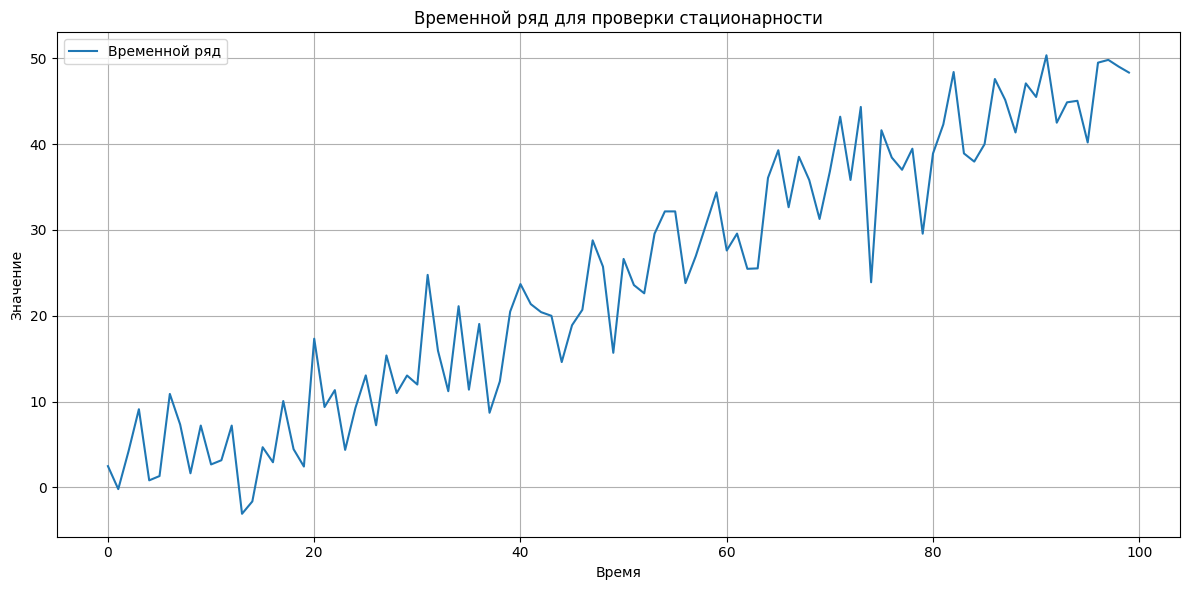

=== Тест Дики-Фуллера (ADF) ===
ADF p-значение: 0.944196
❌ Ряд нестационарен (H0 не отвергнут)

=== KPSS-тест ===
KPSS p-значение: 0.010000
❌ Ряд нестационарен (H0 отвергнут)

--- Сводка ---
📌 Вывод: Ряд, скорее всего, нестационарен.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
import warnings
warnings.filterwarnings("ignore")

# --- 1. Создаем пример временного ряда (с трендом — нестационарный ряд) ---
np.random.seed(42)
t = np.arange(100)
data = 0.5 * t + np.random.normal(0, 5, 100)  # Линейный тренд + шум
series = pd.Series(data)

# --- 2. Визуализация ---
plt.figure(figsize=(12, 6))
plt.plot(series, label='Временной ряд')
plt.title('Временной ряд для проверки стационарности')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 3. Тест Дики-Фуллера (ADF) ---
print("=== Тест Дики-Фуллера (ADF) ===")
adf_result = adfuller(series, autolag='AIC')
adf_pvalue = adf_result[1]
print(f'ADF p-значение: {adf_pvalue:.6f}')
if adf_pvalue < 0.05:
    print("✅ Ряд стационарен (H0 отвергнут)")
else:
    print("❌ Ряд нестационарен (H0 не отвергнут)")

# --- 4. KPSS-тест ---
print("\n=== KPSS-тест ===")
try:
    kpss_stat, kpss_pvalue, lags, crit_vals = kpss(series, regression='c', nlags='auto')
    print(f'KPSS p-значение: {kpss_pvalue:.6f}')
    if kpss_pvalue > 0.05:
        print("✅ Ряд стационарен (H0 не отвергнут)")
    else:
        print("❌ Ряд нестационарен (H0 отвергнут)")
except Exception as e:
    print("Ошибка при выполнении KPSS-теста:", e)

# --- Дополнительно: краткий итог ---
print("\n--- Сводка ---")
if adf_pvalue < 0.05 and kpss_pvalue > 0.05:
    print("📌 Вывод: Ряд, скорее всего, стационарен.")
elif adf_pvalue >= 0.05 and kpss_pvalue <= 0.05:
    print("📌 Вывод: Ряд, скорее всего, нестационарен.")
else:
    print("📌 Вывод: Тесты дают противоречивые результаты. Возможна необходимость дифференцирования.")

In [2]:
import pandas as pd
# Создаем ряд
data = {"sales": [100, 150, 120, 200]}
df = pd.DataFrame(data)
# Добавляем лаги
df["lag_1"] = df["sales"].shift(1)  # сдвиг на 1 шаг
df["lag_2"] = df["sales"].shift(2)  # сдвиг на 2 шага
print(df)

   sales  lag_1  lag_2
0    100    NaN    NaN
1    150  100.0    NaN
2    120  150.0  100.0
3    200  120.0  150.0
